In [1]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autoreject
from autoreject import *


In [5]:
import mne
from mne.datasets import sample
from matplotlib import pyplot as plt

print(__doc__)

# Setup for reading the raw data
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
event_id, tmin, tmax = 1, -0.2, 0.5

# Read the raw data
raw = mne.io.read_raw_fif(raw_fname, preload=True)
events = mne.read_events(event_fname)

# The EEG channels will be plotted to visualize the difference in referencing
# schemes.
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=True, exclude='bads')

Automatically created module for IPython interactive environment
Opening raw data file /home/dcellier/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


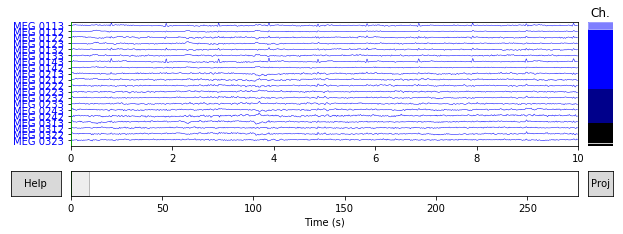

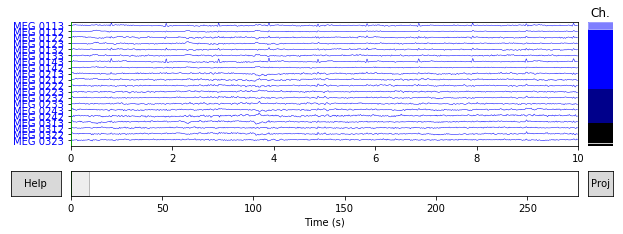

In [6]:
raw.plot()

In [7]:
epoch_array=[]
for t in raw.times[0::1000]: #grabbing sample # (index) of ea 2 second data point
    epoch_array.append([int(list(raw.times).index(t)),int(0),int(7)]) 
epoch_array

[[0, 0, 7],
 [1000, 0, 7],
 [2000, 0, 7],
 [3000, 0, 7],
 [4000, 0, 7],
 [5000, 0, 7],
 [6000, 0, 7],
 [7000, 0, 7],
 [8000, 0, 7],
 [9000, 0, 7],
 [10000, 0, 7],
 [11000, 0, 7],
 [12000, 0, 7],
 [13000, 0, 7],
 [14000, 0, 7],
 [15000, 0, 7],
 [16000, 0, 7],
 [17000, 0, 7],
 [18000, 0, 7],
 [19000, 0, 7],
 [20000, 0, 7],
 [21000, 0, 7],
 [22000, 0, 7],
 [23000, 0, 7],
 [24000, 0, 7],
 [25000, 0, 7],
 [26000, 0, 7],
 [27000, 0, 7],
 [28000, 0, 7],
 [29000, 0, 7],
 [30000, 0, 7],
 [31000, 0, 7],
 [32000, 0, 7],
 [33000, 0, 7],
 [34000, 0, 7],
 [35000, 0, 7],
 [36000, 0, 7],
 [37000, 0, 7],
 [38000, 0, 7],
 [39000, 0, 7],
 [40000, 0, 7],
 [41000, 0, 7]]

In [8]:
raw.info['events']=np.asarray(epoch_array)


In [10]:
scalpData=mne.pick_types(raw.info,meg=False,eeg=True,eog=False)
twoSec_EC_epoch=mne.Epochs(raw,events=epoch_array,tmin=0,tmax=2,event_id={'twoSec':7},picks=scalpData,reject_by_annotation=False)

42 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated


In [11]:
twoSec_EC_epoch.drop_log

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

Loading data for 42 events and 301 original time points ...
7 bad epochs dropped
Loading data for 20 events and 301 original time points ...


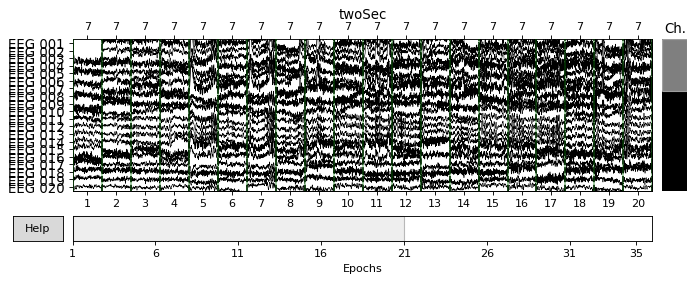

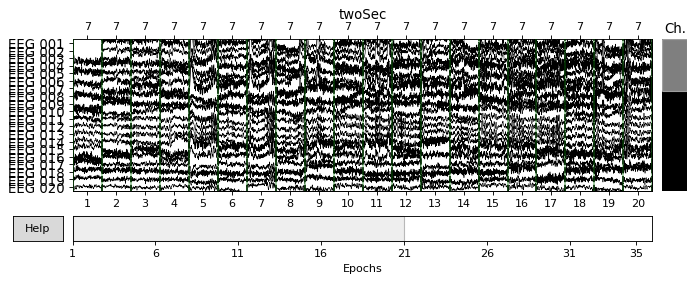

In [12]:
sampledata_epoch.plot()